In [1]:
import numpy as np
import scipy as sp

import time as ttime

from scipy import signal

import sys

sys.path.append('/users/thomas/desktop/repos/maria/maria')


import matplotlib.pyplot as plt

In [2]:
time = np.arange(0,600,0.1)

period = 60


az = 15
el = 45

az_throw = 10
el_throw = 5


phase = 2*np.pi*time/period % (2*np.pi)



In [3]:
from datetime import datetime

import maria 
from maria import tools

import importlib
importlib.reload(maria)

<module 'maria' from '/Users/thomas/Desktop/repos/maria/maria/__init__.py'>

In [4]:
array = maria.array()
plan  = maria.plan()
site  = maria.site()

array.put({ 'n_det' : 256,  
            'shape' : 'hex',
            'bands' : np.repeat(1e9*np.linspace(40,160,4),16)})

plan.put({'scan_type' : 'box', 'el_throw' : 5})

model = maria.lam(array, plan, site)
#%time model.initialize(verbose=True)

In [6]:
#def beam(x0, x, y, f)

In [44]:
x = np.linspace(-1,1,64)
y = np.linspace(-1,1,64)

X, Y = np.meshgrid(x, y, indexing='ij')

In [70]:
B = np.exp(-(np.abs(X+1j*Y)/0.5)**8)
B.shape

(64, 64)

In [62]:
B = (np.abs(X) < 0.5) & (np.abs(Y) < 0.5)

In [71]:
from numpy import linalg as la

u,s,v = la.svd(B)

In [86]:
i = 4

b = s[i] * np.outer(u[:,i],v[i])

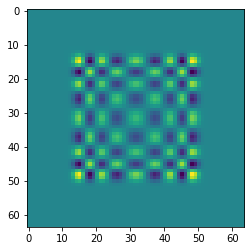

In [88]:
plt.imshow(b)

TypeError: Invalid shape (64,) for image data

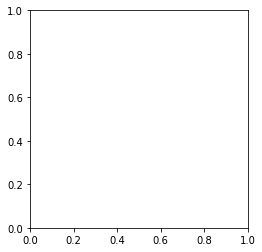

In [81]:
plt.imshow(B[-1])

In [375]:
model.generate_atmosphere()

Generating layers: 100%|██████████| 4011/4011 [00:01<00:00, 2914.75it/s] 


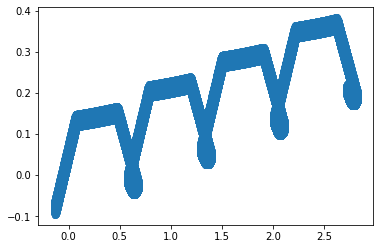

In [386]:
plt.scatter(model.rel_c_x[0][None,:] + model.array.offset_x[:,None],
            model.rel_c_y[0][None,:] + model.array.offset_y[:,None])

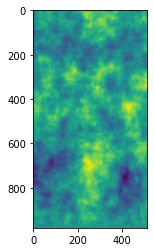

In [387]:
plt.imshow(model.vals[-1])

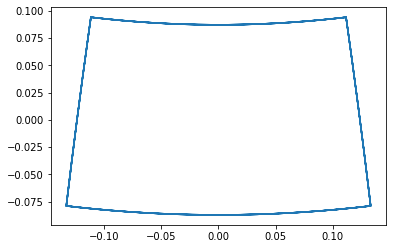

In [356]:
#plt.plot(model.w_v_x[0])
plt.plot(model.plan.c_x, model.plan.c_y)
plt.plot(model.plan.c_x + np.cumsum(), model.plan.c_y)

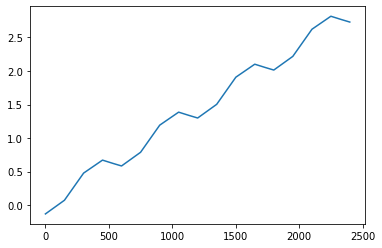

In [374]:
plt.plot(model.rel_c_x[0])

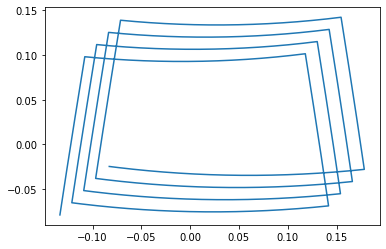

In [363]:
plt.plot(model.plan.c_x + np.cumsum(model.w_v_x * plan.dt, axis=1)[-1],
         model.plan.c_y + np.cumsum(model.w_v_y * plan.dt, axis=1)[-1])

In [331]:
model.theta_y.shape

(256, 2400)

In [326]:
plan.c_x.shape

(2400,)

In [336]:
model.w_v_x.shape

(5, 2400)

In [313]:
model.sim()

NameError: name 'ttime' is not defined

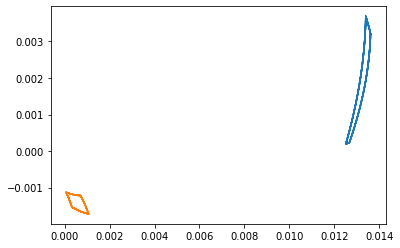

In [311]:
plt.plot(model.wind_x_v[0], model.wind_y_v[0])
plt.plot(model.wind_x_v[-1], model.wind_y_v[-1])

In [304]:
plt.imshow(model.vals[0])

AttributeError: 'lam' object has no attribute 'vals'

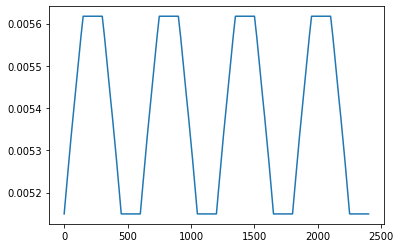

In [299]:
plt.plot(model.lay_scaling[0])

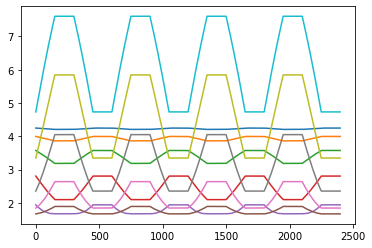

In [212]:
plt.plot(model.w_n.T)
plt.show()

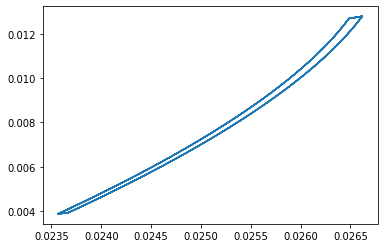

In [213]:
plt.plot(model.wind_x_v[0], model.wind_y_v[0])
plt.show()

In [214]:
model.wind_x[0]

AttributeError: 'lam' object has no attribute 'wind_x'

In [111]:
import weathergen

In [112]:
model.weather['pwv']

7.265072980923543

CPU times: user 645 µs, sys: 481 µs, total: 1.13 ms
Wall time: 616 µs


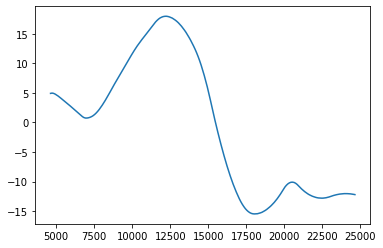

In [83]:
%time weather = weathergen.generate(region='chajnantor', time=0, method='random')
plt.plot(weather['height'], weather['wind_east'])

In [76]:
weather.keys()

dict_keys(['lpwv', 'lnwd', 'temperature', 'wind_east', 'wind_north', 'pwv', 'water_density', 'height'])

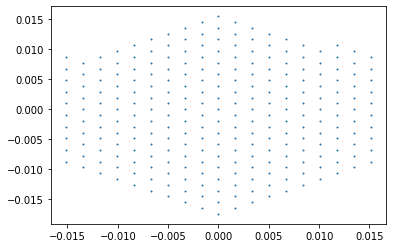

In [63]:
plt.scatter(array.offset_x, array.offset_y, s=1)

In [6]:
layer_beam_edges.shape

NameError: name 'layer_beam_edges' is not defined

In [9]:
waist_sample_prop + beam_tol

NameError: name 'waist_sample_prop' is not defined

In [10]:
layer_array_hulls = [sp.spatial.qhull.ConvexHull(np.c_[x.ravel(),y.ravel()]) for x, y in zip(np.real(layer_beam_edges_z), np.imag(layer_beam_edges_z))]

NameError: name 'layer_beam_edges_z' is not defined

In [11]:
layer_array_hull_x, layer_array_hull_y = [h.points[h.vertices][:,0] for h in layer_hulls], [h.points[h.vertices][:,1] for h in layer_hulls]


NameError: name 'layer_hulls' is not defined

In [12]:
#layer_hull_x

In [457]:
i_layer = 0

array_hull_x, array_hull_y = layer_array_hull_x[i_layer], layer_array_hull_y[i_layer]

In [458]:
max_layer_beam_radii = 0.5 * model.angular_waists.max(axis=1)

In [400]:
unit_z = np.exp(1j*np.linspace(0,2*np.pi,16+1)[:-1])

radius_sample_prop = 1.5
beam_tol = 1e-1

max_layer_beam_radii = 0.5 * model.angular_waists.max(axis=1)

layer_beam_edges_z = (radius_sample_prop + beam_tol) * max_layer_beam_radii[:,None,None] * unit_z[None,None,:] + array.offset_z[None,:,None]

In [459]:
max_layer_beam_radii

array([0.00500861, 0.00251718, 0.00169233, 0.00128402, 0.00104222,
       0.00088355, 0.00077228, 0.00069054, 0.00062838, 0.00057984])

In [463]:
padded_radius = max_layer_beam_radii + array.offset_r.max()
padded_radius

array([0.02246191, 0.01997048, 0.01914563, 0.01873732, 0.01849551,
       0.01833684, 0.01822558, 0.01814383, 0.01808167, 0.01803314])

In [7]:
max_layer_beam_radii = 0.5 * model.angular_waists.max(axis=1)

In [8]:
radius_sample_prop = 1.5
beam_tol = 1e-1

t0 = ttime.time()

unit_z = np.exp(1j*np.linspace(0,2*np.pi,64+1)[:-1])
unit_x, unit_y = np.real(unit_z), np.imag(unit_z)

padded_radius = (radius_sample_prop + beam_tol) * max_layer_beam_radii + array.offset_r.max()

edge_x = padded_radius[:,None,None] * unit_x[None,None,:] + plan.c_x[None,:,None]
edge_y = padded_radius[:,None,None] * unit_y[None,None,:] + plan.c_y[None,:,None]

hull_tdsr = 16

layer_array_hulls = [sp.spatial.qhull.ConvexHull(np.c_[x[::hull_tdsr].ravel(),y[::hull_tdsr].ravel()]) for x, y in zip(edge_x, edge_y)]

t1 = ttime.time()

for i_layer in range(model.n_layers):
    
    layer_array_hull = layer_array_hulls[i_layer]
    layer_hull_verts = layer_array_hull.points[layer_array_hull.vertices]
    
    print(layer_hull_verts.shape)
    
    mara = tools.get_MARA(layer_hull_verts[:,0] + 1j*layer_hull_verts[:,1])
    
t2 = ttime.time()

(122, 2)
(122, 2)
(122, 2)
(122, 2)
(122, 2)
(122, 2)
(122, 2)
(122, 2)
(122, 2)
(122, 2)


In [18]:
padded_radius

array([0.02546708, 0.02148079, 0.02016103, 0.01950773, 0.01912084,
       0.01886697, 0.01868895, 0.01855815, 0.0184587 , 0.01838104])

In [19]:
hull = sp.spatial.qhull.ConvexHull(np.c_[plan.c_x, plan.c_y])
h_x, h_y = hull.points[hull.vertices].T; h_z = h_x + 1j * h_y
layer_hull_z = h_z[:,None] * (np.abs(h_z[:,None]) + padded_radius[None,:]) / np.abs(h_z[:,None])

In [39]:
model.theta_z.shape

(256, 2400)

In [45]:
padded_radius[None,:]

array([[0.02546708, 0.02148079, 0.02016103, 0.01950773, 0.01912084,
        0.01886697, 0.01868895, 0.01855815, 0.0184587 , 0.01838104]])

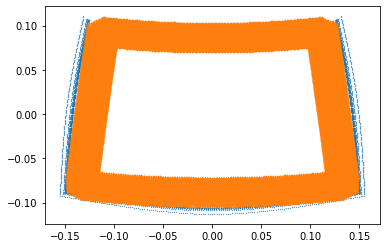

In [44]:
i_layer = 0

z = layer_hull_z

plt.scatter(np.real(z), np.imag(z), s=1e-1)



plt.scatter(np.real(model.theta_z), np.imag(model.theta_z), s=1e-1)

In [11]:
t1 - t0, t2 - t1

(0.034898996353149414, 0.05598616600036621)

In [486]:
i_layer = 0

layer_array_hull = layer_array_hulls[i_layer]
layer_hull_verts = layer_array_hull.points[layer_array_hull.vertices]

In [494]:
z = (layer_hull_verts[:,0] + 1j*layer_hull_verts[:,1]) * np.exp(1j*np.pi/2)

In [496]:
tools.get_MARA(layer_hull_verts[:,0] + 1j*layer_hull_verts[:,1])

0

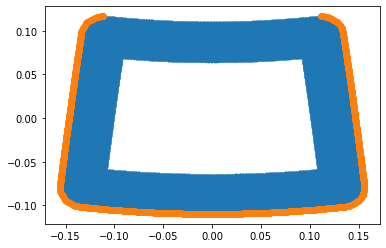

In [479]:
plt.scatter(edge_x, edge_y, s=1e-1)
plt.scatter(*array_hull.points[array_hull.vertices].T)

In [440]:
array_padding = (radius_sample_prop + beam_tol) * max_layer_beam_radii

array_padding.shape

(10,)

In [449]:
layer_hull_pts

[array([[-2.31287777e-02,  8.72664626e-03],
        [-2.31287777e-02, -8.72664626e-03],
        [-2.25187648e-02, -1.17933882e-02],
        [-2.07815950e-02, -1.43932465e-02],
        [-1.81817367e-02, -1.61304163e-02],
        [-3.06674197e-03, -2.48570626e-02],
        [-5.63805858e-18, -2.54670755e-02],
        [ 3.06674197e-03, -2.48570626e-02],
        [ 1.81817367e-02, -1.61304163e-02],
        [ 2.07815950e-02, -1.43932465e-02],
        [ 2.25187648e-02, -1.17933882e-02],
        [ 2.31287777e-02, -8.72664626e-03],
        [ 2.31287777e-02,  3.35640241e-03],
        [ 2.25474317e-02,  8.39100602e-03],
        [ 2.19374188e-02,  1.14577480e-02],
        [ 2.02002490e-02,  1.40576063e-02],
        [ 1.76003907e-02,  1.57947761e-02],
        [ 3.06674197e-03,  2.41857821e-02],
        [ 4.66887931e-18,  2.47957950e-02],
        [-3.06674197e-03,  2.41857821e-02],
        [-1.81817367e-02,  1.61304163e-02],
        [-2.07815950e-02,  1.43932465e-02],
        [-2.25187648e-02,  1.179

In [445]:
# (layer, frequency, detector, time)



# (layer, detector, time)

%time x = (model.x[None,:,:] - array.offset_x[None,:,None]) * ((array.offset_x[None,:,None] + array_padding[:,None,None]) / array.offset_x[None,:,None])

CPU times: user 138 ms, sys: 98.8 ms, total: 237 ms
Wall time: 239 ms


In [448]:
#x

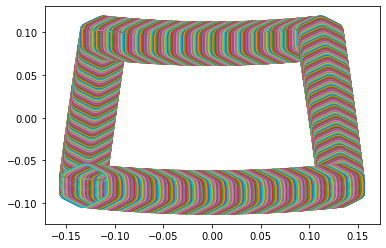

In [427]:
#plt.plot(pts[:,0][:,None] + plan.c_x[None,:], pts[:,1][:,None] + plan.c_y[None,:])
#plt.show()

In [421]:
pts[:,None,:] + np.c_[plan.c_x, plan.c_y][None,:,:]

array([[[-0.15654646, -0.07028201],
        [-0.15641533, -0.06912731],
        [-0.15628402, -0.06797262],
        ...,
        [-0.15123113, -0.0709277 ],
        [-0.1530032 , -0.07071537],
        [-0.15477498, -0.07050013]],

       [[-0.15654646, -0.0877353 ],
        [-0.15641533, -0.08658061],
        [-0.15628402, -0.08542591],
        ...,
        [-0.15123113, -0.08838099],
        [-0.1530032 , -0.08816866],
        [-0.15477498, -0.08795343]],

       [[-0.15593645, -0.09080204],
        [-0.15580532, -0.08964735],
        [-0.15567401, -0.08849265],
        ...,
        [-0.15062111, -0.09144774],
        [-0.15239319, -0.0912354 ],
        [-0.15416497, -0.09102017]],

       ...,

       [[-0.15159942, -0.06287824],
        [-0.15146829, -0.06172354],
        [-0.15133698, -0.06056885],
        ...,
        [-0.14628409, -0.06352393],
        [-0.14805616, -0.0633116 ],
        [-0.14982794, -0.06309636]],

       [[-0.15419928, -0.06461541],
        [-0.15406815, -0.06

In [417]:
pts.shape

(23, 2)

In [409]:
#scan_hull_pts = [np.concatenate([h_x[:,None] + plan.c_x[None,:], h_y[:,None] + plan.c_y[None,:]][:,:,None],axis=2) for h_x, h_y in zip(layer_hull_x, layer_hull_y)]

In [392]:
scan_hull_pts[0].shape

(58, 2400, 1)

In [378]:
#plt.plot(layer_hull_x[i], layer_hull_y[i])

In [364]:
layer_hull_points[0][:,None,:].shape

(29, 1, 2)

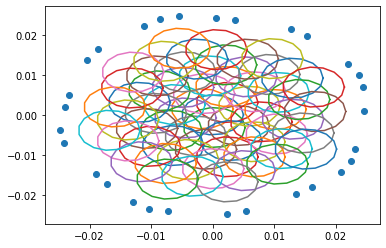

In [358]:
i = 0

h = layer_hulls[i]
r = max_layer_beam_radii[i]

plt.scatter(*h.points[h.vertices].T)
plt.plot(array.offset_x[None,:] + r * np.cos(np.linspace(0,2*np.pi,16))[:,None], 
            array.offset_y[None,:] + r * np.sin(np.linspace(0,2*np.pi,16))[:,None])
plt.show()

In [308]:
layer_hulls[0].vertices

array([1903, 1904, 1905, 1906, 1907, 1747, 1748, 2004, 2005, 2006, 2007,
       2008, 1848, 1849, 1850, 1851, 1691, 1947, 1948, 1949, 1950, 1951,
       1791, 1760, 2016, 2017, 2018, 2019, 2020, 1860, 1861, 1862, 1863,
       1703, 1704, 1960, 1961, 1962, 1963, 1803, 1804, 1805, 1806, 1646,
       1647], dtype=int32)

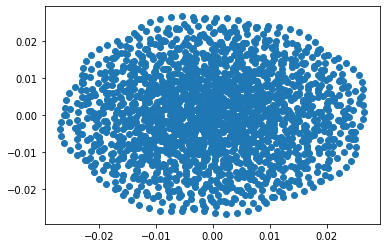

In [282]:


z = max_layer_beam_waist[:,None,None] * unit_z[None,:,None] + array.offset_z[None,None,:]
plt.scatter(np.real(z[0]), np.imag(z[0]))

In [255]:
model.array.offset_z[hull.vertices]

array([-0.00540714+0.01666758j, -0.01294281+0.01069399j,
       -0.01589918+0.00198148j, -0.01679421-0.00386431j,
       -0.01157223-0.01174284j, -0.0073311 -0.01607277j,
        0.00234056-0.01677597j,  0.01048641-0.01231986j,
        0.01512037-0.00856659j,  0.01661693+0.00084963j,
        0.01639335+0.0069549j ,  0.00969005+0.01407295j,
        0.00059524+0.01632247j])

In [248]:
model.angular_waists.max(axis=1)

array([0.01001723, 0.00503437, 0.00338467, 0.00256805, 0.00208444,
       0.0017671 , 0.00154457, 0.00138108, 0.00125676, 0.00115969])

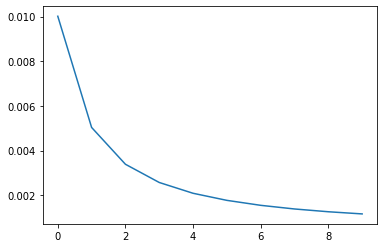

In [245]:
plt.plot(model.angular_waists.max(axis=1))

In [242]:
model.array.offset_z

array([ 0.00000000e+00+0.j        , -1.65432667e-03+0.0015155j ,
        2.77389941e-04-0.00316072j,  2.36436238e-03+0.00308389j,
       -4.41851516e-03-0.00078157j,  4.23289974e-03-0.00269262j,
       -1.42667149e-03+0.00530715j, -2.73589116e-03-0.00526779j,
        5.96067758e-03+0.00217683j, -6.22145667e-03+0.00256813j,
        3.00707703e-03-0.00642595j,  2.22697896e-03+0.00709996j,
       -6.72433326e-03-0.00389689j,  7.90057245e-03-0.00173692j,
       -4.82798684e-03+0.00686731j, -1.11666101e-03-0.0086172j ,
        6.86212433e-03+0.00578341j, -9.24250953e-03+0.00038221j,
        6.74705814e-03-0.00671422j, -4.51725728e-04+0.00976899j,
       -6.42854057e-03-0.00770354j,  1.01894370e-02+0.00137097j,
       -8.63805614e-03+0.00601013j,  2.36155491e-03-0.01049735j,
        5.46457642e-03+0.00953641j, -1.06870870e-02-0.00340947j,
        1.03850617e-02-0.00479816j, -4.50064102e-03+0.01075405j,
       -4.01802771e-03-0.01117114j,  1.06947759e-02+0.00562087j,
       -1.18825623e-02+0.

In [236]:
model.angular_waists.shape

(10, 270)

In [228]:
model.angular_waists

array([[0.01001723, 0.01001622, 0.01001529, ..., 0.01000067, 0.01000066,
        0.01000066],
       [0.00503437, 0.00503235, 0.00503051, ..., 0.00500135, 0.00500133,
        0.00500131],
       [0.00338467, 0.00338167, 0.00337893, ..., 0.00333535, 0.00333533,
        0.0033353 ],
       ...,
       [0.00138108, 0.00137371, 0.00136695, ..., 0.00125537, 0.00125531,
        0.00125524],
       [0.00125676, 0.00124866, 0.00124121, ..., 0.00111715, 0.00111708,
        0.00111701],
       [0.00115969, 0.00115091, 0.00114282, ..., 0.00100671, 0.00100663,
        0.00100655]])

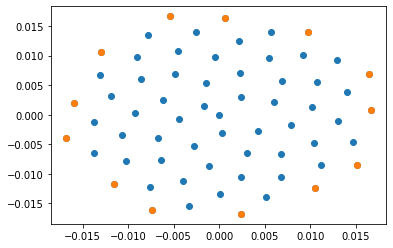

In [220]:

plt.scatter(*array.offsets.T)
plt.scatter(*hull.points[hull.vertices].T)

In [218]:
hull = sp.spatial.qhull.ConvexHull(array.offsets)
dir(hull)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_update',
 '_vertices',
 'add_points',
 'area',
 'close',
 'coplanar',
 'equations',
 'good',
 'max_bound',
 'min_bound',
 'ndim',
 'neighbors',
 'npoints',
 'nsimplex',
 'points',
 'simplices',
 'vertices',
 'volume']

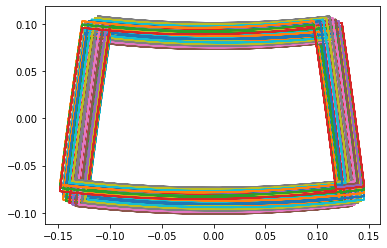

In [199]:
plt.plot(model.x.T, model.y.T)
plt.show()

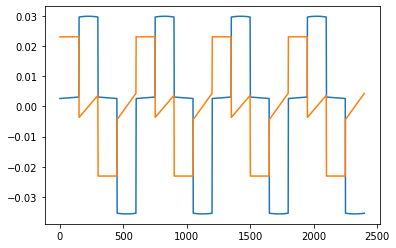

In [183]:
plt.plot(plan.c_x_v)
plt.plot(plan.c_y_v)

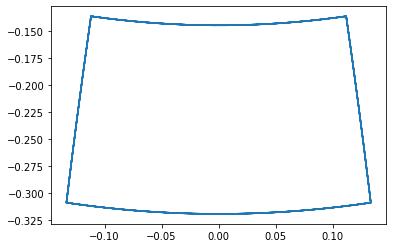

In [173]:
plt.plot(x, y)
#plt.plot(y)

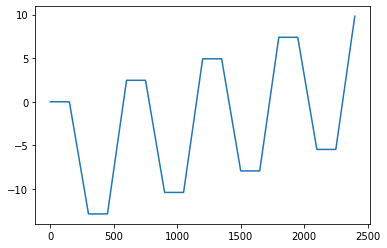

In [164]:
plt.plot(np.cumsum(plan.x_v*plan.dt))

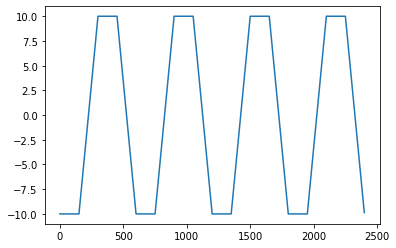

In [146]:
plt.plot(plan.azim)

In [133]:
array.x

array([-4.68489716e-17, -1.73205081e-01, -1.73205081e-01, -8.35883756e-17,
        1.73205081e-01,  1.73205081e-01,  1.43833684e-17, -3.46410162e-01,
       -3.46410162e-01, -3.46410162e-01, -1.73205081e-01, -1.20327780e-16,
        1.73205081e-01,  3.46410162e-01,  3.46410162e-01,  3.46410162e-01,
        1.73205081e-01,  7.56157083e-17, -1.73205081e-01, -5.19615242e-01,
       -5.19615242e-01, -5.19615242e-01, -5.19615242e-01, -3.46410162e-01,
       -1.73205081e-01, -1.57067184e-16,  1.73205081e-01,  3.46410162e-01,
        5.19615242e-01,  5.19615242e-01,  5.19615242e-01,  5.19615242e-01,
        3.46410162e-01,  1.73205081e-01,  1.36848048e-16, -1.73205081e-01,
       -3.46410162e-01, -6.92820323e-01, -6.92820323e-01, -6.92820323e-01,
       -6.92820323e-01, -6.92820323e-01, -5.19615242e-01, -3.46410162e-01,
       -1.73205081e-01, -1.93806587e-16,  1.73205081e-01,  3.46410162e-01,
        5.19615242e-01,  6.92820323e-01,  6.92820323e-01,  6.92820323e-01,
        6.92820323e-01,  

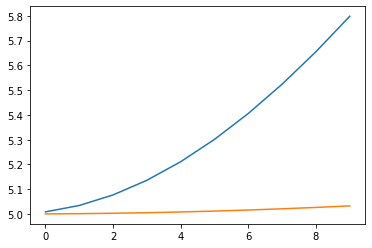

In [132]:
plt.plot(model.waists[:,0])
plt.plot(model.waists[:,-1])

In [125]:
array.bands

array([4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10,
       4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10, 4.0e+10,
       4.0e+10, 4.0e+10, 8.0e+10, 8.0e+10, 8.0e+10, 8.0e+10, 8.0e+10,
       8.0e+10, 8.0e+10, 8.0e+10, 8.0e+10, 8.0e+10, 8.0e+10, 8.0e+10,
       8.0e+10, 8.0e+10, 8.0e+10, 8.0e+10, 1.2e+11, 1.2e+11, 1.2e+11,
       1.2e+11, 1.2e+11, 1.2e+11, 1.2e+11, 1.2e+11, 1.2e+11, 1.2e+11,
       1.2e+11, 1.2e+11, 1.2e+11, 1.2e+11, 1.2e+11, 1.2e+11, 1.6e+11,
       1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11,
       1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11, 1.6e+11,
       1.6e+11])

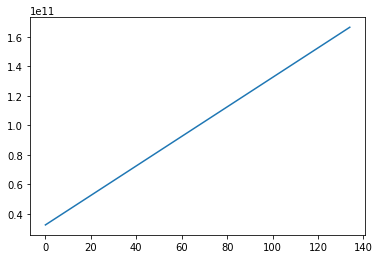

In [126]:
plt.plot(array.nu)

In [127]:
array.passbands

array([[7.86438349e-13, 3.04427398e-05, 1.24511210e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.86438349e-13, 3.04427398e-05, 1.24511210e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.86438349e-13, 3.04427398e-05, 1.24511210e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.90570005e-02, 1.24511210e-02, 3.04427398e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.90570005e-02, 1.24511210e-02, 3.04427398e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.90570005e-02, 1.24511210e-02, 3.04427398e-05]])

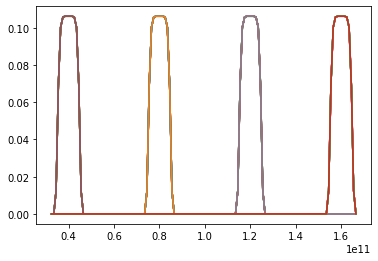

In [128]:
for i_det in range(array.n_det):

    plt.plot(array.nu, array.passbands[i_det])

In [77]:
array.passbands.shape

(64, 75)

In [ ]:
model = maria.lam(array, plan, site)

model.initialize()




In [54]:
offsets = np.random.standard_normal(size=(64,2))

In [55]:
datetime(2000,1,1).timestamp

<function datetime.timestamp>

In [72]:
def iterize(x):
    return np.array([x]).ravel()
    
iterize([5,10])

array([ 5, 10])

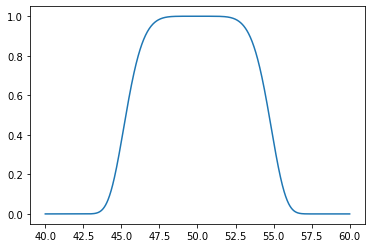

In [85]:
def get_passband(nu, nu_0, nu_w, order=4):
    return np.exp(-np.abs(2*(nu-nu_0)/nu_w)**order)

nu = np.linspace(40,60,1000)

plt.plot(nu, get_passband(nu, 50, 10, order=6))

In [74]:
np.repeat([5,10],5)

array([ 5,  5,  5,  5,  5, 10, 10, 10, 10, 10])

In [ ]:
self.beams.get_waist(self.atmosphere.depths[:,None],
                    self.beams.aperture,
                    self.array.nom_band_list[None,:])

In [59]:
model.depths

array([ 500., 1000., 1500., 2000.])

In [58]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'config',
 'depths',
 'initialize',
 'max_depth',
 'min_depth',
 'n_layers',
 'put',
 'site_mode']

In [7]:
plan = maria.plan()

plan.put({'el_throw' : 5,
          'scan_type' : 'box',
          'duration' : 600}, verbose=True)

auto
set el_throw to 5
set scan_type to box
set duration to 600


In [ ]:
model = maria.lam()

In [21]:
plan.config

{'duration': 600,
 'sample_rate': 20,
 'scan_period': 30,
 'scan_type': 'box',
 'az': 0,
 'el': 45,
 'az_throw': 10,
 'el_throw': 5}

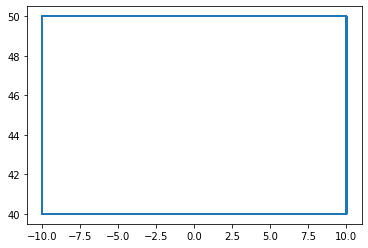

In [23]:
plt.plot(plan.azim, plan.elev)

auto
set n_det to 256
set fov to 2


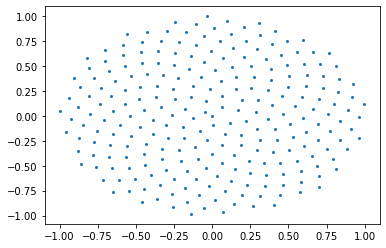

In [47]:
array = maria.array({'shape' : 'flower'})

#site = maria.site()


#plan = maria.plan()
array.put({'n_det' : 256, 'fov' : 2}, verbose=True)



plt.scatter(*array.offsets.T, s=4)

In [48]:

sp.signal


NameError: name 'sp' is not defined

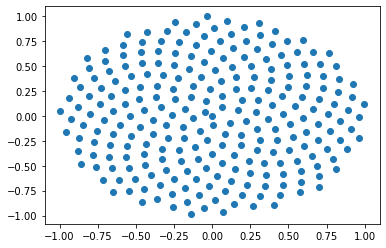

In [112]:
plt.scatter(*array.offsets.T)

In [ ]:

model = maria.lam()

model.initialize()
model.simulate()

In [ ]:
model.array

model.site

model.plans

In [ ]:
model.array()



In [6]:
model.array.offsets

AttributeError: 'Model' object has no attribute 'array'

In [20]:
array = telescope.Array()



site = telescope.Site()


#array.offsets

In [15]:
maria.model()

NameError: name 'maria' is not defined

In [25]:
from maria import model

model = maria.model(telescope='act')

model.put({'latitude' : 0,
           'longitude' : 0,
           'altitude' : 0})

model.initialize()

model.simulate()






TypeError: 'module' object is not callable

In [20]:
maria.telescope

NameError: name 'maria' is not defined